## Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

## Описание данных
Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
id — уникальный идентификатор коровы.
Удой, кг — масса молока, которую корова даёт в год (в килограммах).
ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
Сырой протеин, г — содержание сырого протеина в корме (в граммах).
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Жирность,% — содержание жиров в молоке (в процентах).
Белок,% — содержание белков в молоке (в процентах).
Вкус молока— оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
Характеристики коровы: id, Порода, порода папы_быка, Возраст
Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
Характеристика пастбища: Тип пастбища.
Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
id — уникальный идентификатор коровы.
Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Имя_папы — имя папы коровы.
Текущая_жирность,% — содержание жиров в молоке (в процентах).
Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

# Загрузка данных

In [1]:
#Обновление библиотеки scikit
!pip install scikit-learn==1.1.3 

     |████████████████████████████████| 30.8 MB 1.2 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


## Импорт библиотек


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix

In [3]:
# Загрузка датасетов и переименование некоторых столбцов, для дальнейшей работы с ними.
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
ferma_main.columns = ['id','удой_кг', 'эке(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо(сахаро_протеиновое_соотношение)','порода','тип_пастбища', 'порода_папы_быка','жирность_%', 'белок_%', 'вкус_молока', 'возраст'] 
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
ferma_dad.columns = ['id', 'имя_папы']
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')
cow_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'текущая_жирность_%', 'текущий_уровень_белок_%', 'возраст']

## Проверка данных

In [4]:
ferma_main.sample(5)

,id,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
105,106,6750,15.5,1958,0.95,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.073,вкусно,более_2_лет
23,24,6320,14.3,1822,0.93,Вис Бик Айдиал,Равнинные,Айдиалл,3.71,3.075,вкусно,более_2_лет
598,599,6584,16.4,2309,0.94,РефлешнСоверинг,Холмистое,Соверин,3.72,3.076,вкусно,более_2_лет
25,26,6365,15.2,1821,0.93,Вис Бик Айдиал,Равнинные,Айдиалл,3.73,3.074,не вкусно,более_2_лет
403,404,5262,12.6,1786,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.081,вкусно,менее_2_лет


In [5]:
ferma_dad.sample(5)

,id,имя_папы
530,531,Буйный
61,62,Барин
379,380,Соловчик
176,177,Геркулес
562,563,Соловчик


In [6]:
cow_buy.sample(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет


### Вывод:
Во время загрузкы данных былим импортированы все библиотеки и датасеты были сохранены в переменные

#  Предобработка данных

In [7]:
# Рассмотрим датафрейм ferma_main
ferma_main.describe()

,id,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),жирность_%,белок_%
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [8]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    634 non-null    int64  
 1   удой_кг                               634 non-null    int64  
 2   эке(энергетическая_кормовая_единица)  634 non-null    float64
 3   сырой_протеин_г                       634 non-null    int64  
 4   спо(сахаро_протеиновое_соотношение)   634 non-null    float64
 5   порода                                634 non-null    object 
 6   тип_пастбища                          634 non-null    object 
 7   порода_папы_быка                      634 non-null    object 
 8   жирность_%                            634 non-null    float64
 9   белок_%                               634 non-null    float64
 10  вкус_молока                           634 non-null    object 
 11  возраст            

In [9]:
ferma_main.isna().sum()

id                                      0
удой_кг                                 0
эке(энергетическая_кормовая_единица)    0
сырой_протеин_г                         0
спо(сахаро_протеиновое_соотношение)     0
порода                                  0
тип_пастбища                            0
порода_папы_быка                        0
жирность_%                              0
белок_%                                 0
вкус_молока                             0
возраст                                 0
dtype: int64

In [10]:
ferma_main.duplicated().sum()

5

In [11]:
ferma_main=ferma_main.drop_duplicates()

In [12]:
ferma_main.duplicated().sum()

0

In [13]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [14]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')

In [15]:
ferma_main['тип_пастбища']=ferma_main['тип_пастбища'].str.lower()

In [16]:
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [17]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [18]:
ferma_main['порода_папы_быка']=ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

In [19]:
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [20]:
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [21]:
ferma_main.shape

(629, 12)

In [22]:
# Рассмотрим датафрейм ferma_dad
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [23]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [24]:
ferma_dad.duplicated().sum()

0

In [25]:
ferma_dad.shape

(629, 2)

In [26]:
# Рассмотрим датафрейм cow_boy
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность_%       20 non-null     float64
 5   текущий_уровень_белок_%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [27]:
cow_buy.isna().sum()

порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность_%         0
текущий_уровень_белок_%    0
возраст                    0
dtype: int64

In [28]:
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [29]:
cow_buy['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [30]:
cow_buy['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [31]:
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [32]:
cow_buy.shape

(20, 7)

### Вывод:
На первом этапе были удалены все дубликаты, явные и неявные. Типы данных указаны верно, а пропуски отсутствуют. 

# Исследовательский анализ данных

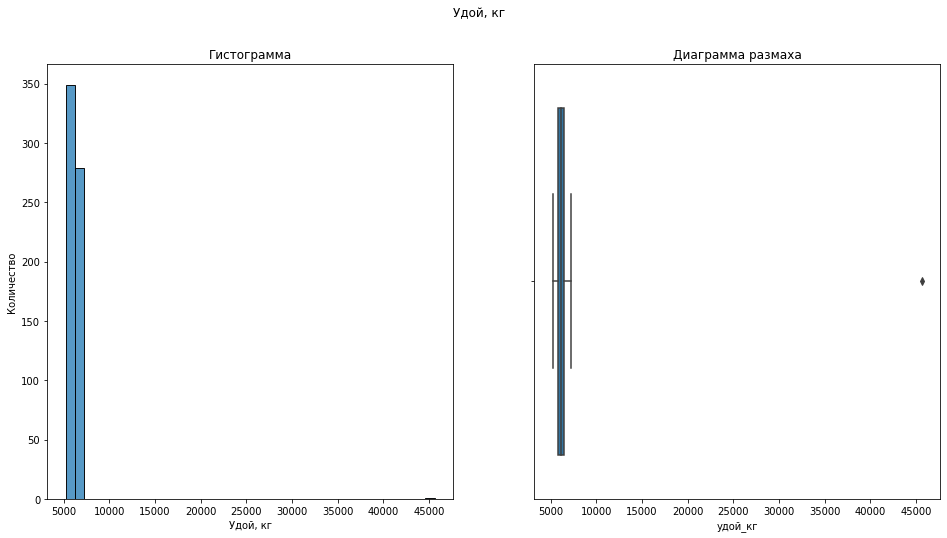

In [33]:
# Построим гистограмму и даиграмму размаха
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.boxplot(data = ferma_main,x = 'удой_кг', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удой, кг')
sns.histplot(data = ferma_main,x = 'удой_кг', ax=axs[0], bins = 40)
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
plt.show()

В столбце есть одно выское аномальное значение. Удалим его.

In [34]:
ferma_main=ferma_main.loc[ferma_main['удой_кг']<40000]

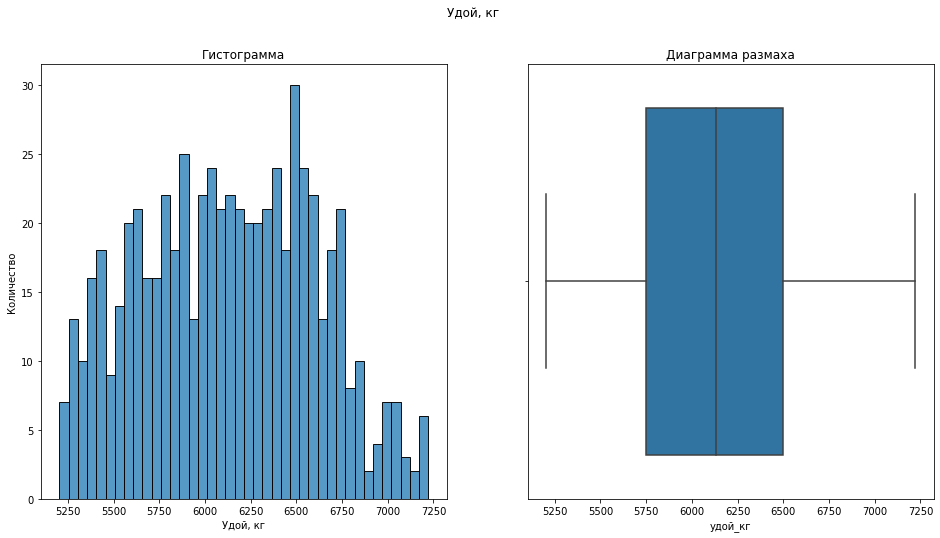

Медианное значение: 6132.5


In [35]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.boxplot(data = ferma_main,x = 'удой_кг', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удой, кг')
sns.histplot(data = ferma_main,x = 'удой_кг', ax=axs[0], bins = 40)
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
plt.show()
print('Медианное значение:', ferma_main['удой_кг'].median())

Выбросов нет, распределение близкое к нормальному

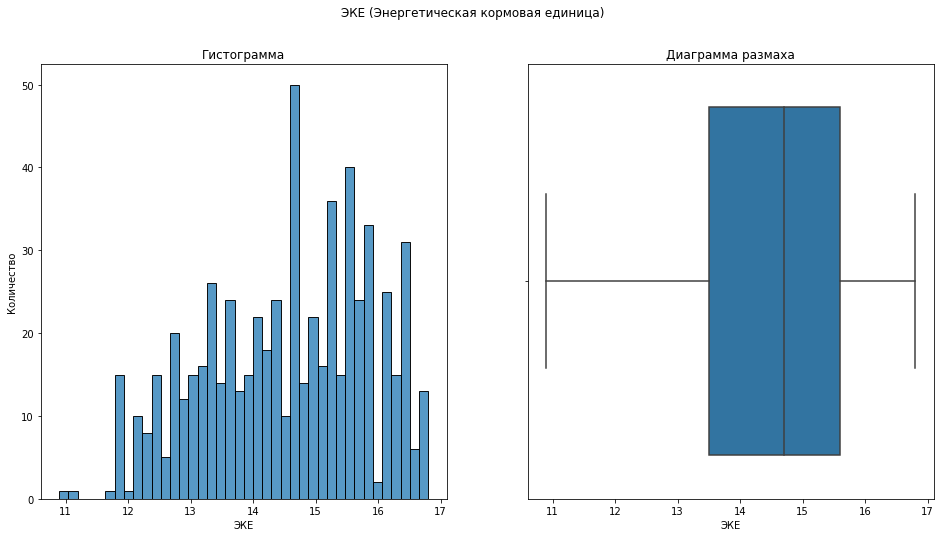

Медианное значение: 14.7


In [36]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'эке(энергетическая_кормовая_единица)', ax=axs[0], bins = 40)
axs[0].set_xlabel('ЭКЕ')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'эке(энергетическая_кормовая_единица)', ax=axs[1])
axs[1].set_xlabel('ЭКЕ')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('ЭКЕ (Энергетическая кормовая единица)')
plt.show()
print('Медианное значение:', ferma_main['эке(энергетическая_кормовая_единица)'].median())

Выбросов нет.

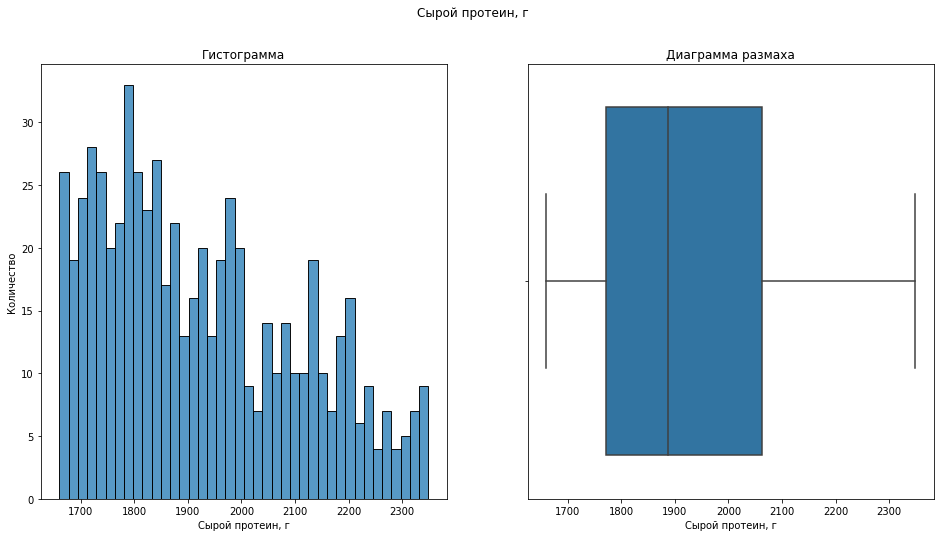

Медианное значение: 1888.0


In [37]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'сырой_протеин_г', ax=axs[0], bins = 40)
axs[0].set_xlabel('Сырой протеин, г')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'сырой_протеин_г', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Сырой протеин, г')
fig.suptitle('Сырой протеин, г')
plt.show()
print('Медианное значение:', ferma_main['сырой_протеин_г'].median())

Выбросов нет.

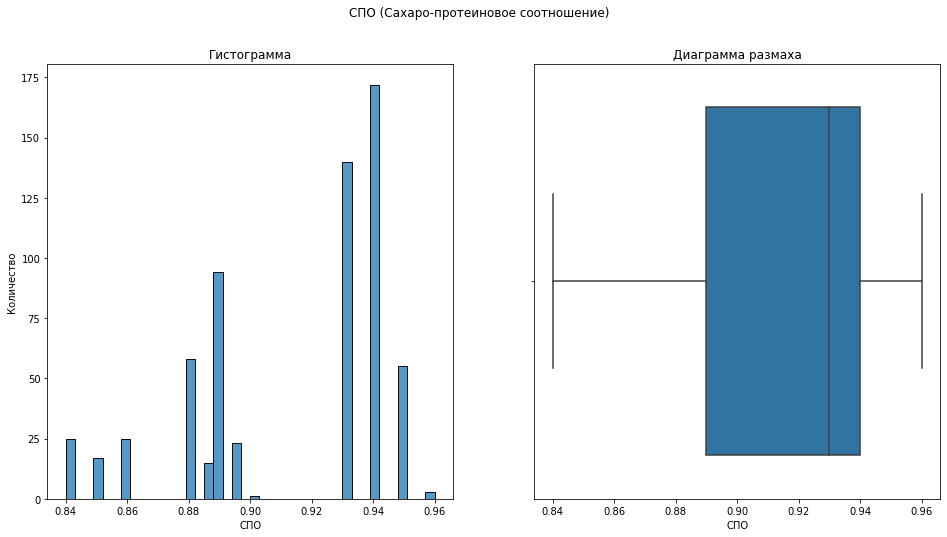

Медианное значение: 0.93


In [38]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'спо(сахаро_протеиновое_соотношение)', ax=axs[0], bins = 40)
axs[0].set_xlabel('СПО')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'спо(сахаро_протеиновое_соотношение)', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('СПО')
fig.suptitle('СПО (Сахаро-протеиновое соотношение)')
plt.show()
print('Медианное значение:', ferma_main['спо(сахаро_протеиновое_соотношение)'].median())

<div class="alert alert-warning">
<b>Комментарий 👉</b>



(на примере моего скрина ниже) Вот здесь уже видно, что этот  признак - кандидат на перевод в категориальную шкалу (из 2х или из 3х элементов - что надо проверять качеством модели итоговой).
    

</div>

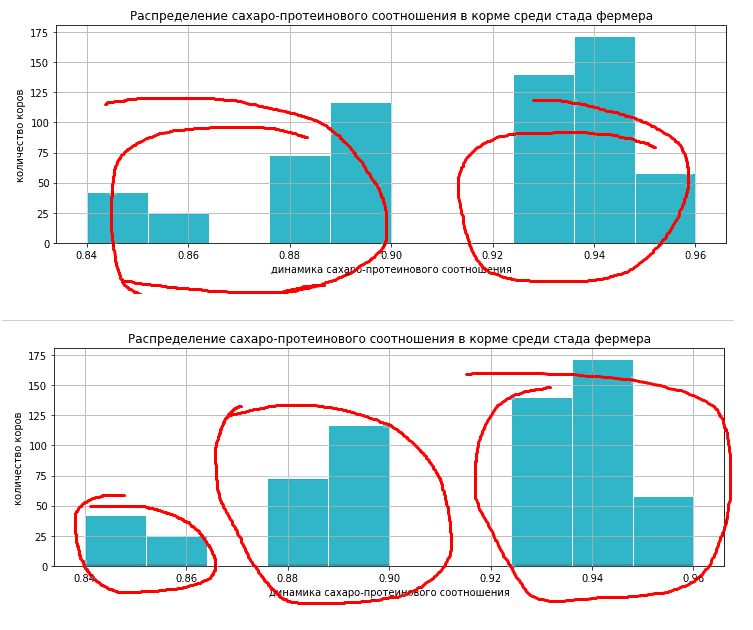

Выбросов нет. На графике видно, что некоторые значения встречаются наиболее часто.

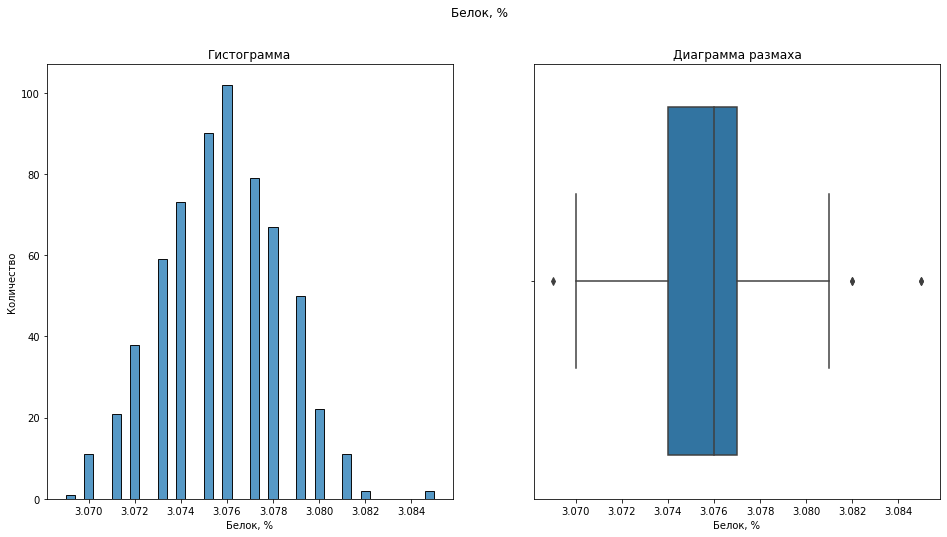

Медианное значение: 3.076


In [39]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'белок_%', ax=axs[0], bins = 40)
axs[0].set_xlabel('Белок, %')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'белок_%', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Белок, %')
fig.suptitle('Белок, %')
plt.show()
print('Медианное значение:', ferma_main['белок_%'].median())

Есть значения, похожие на выборсы. Не разница не велика, поэтому можно оставить. Распределение близкое к нормальному.

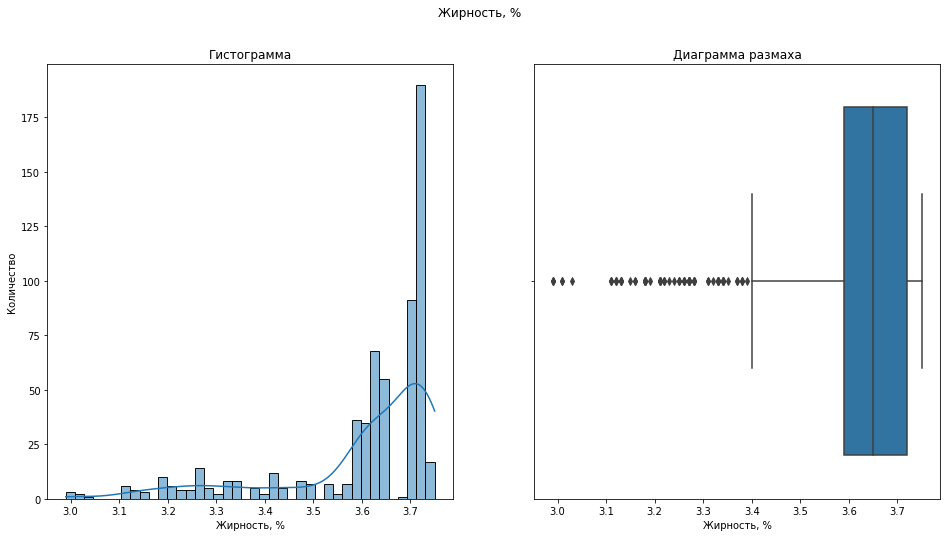

Медианное значение: 3.65


In [40]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'жирность_%', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Жирность, %')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'жирность_%', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Жирность, %')
fig.suptitle('Жирность, %')
plt.show()
print('Медианное значение:', ferma_main['жирность_%'].median())

Есть множество выбросов, но поскольку молоко жирностью 3% является нормой, можно их не удалять

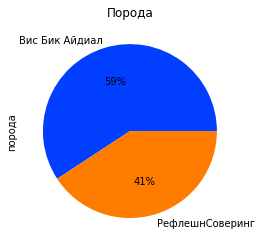

In [41]:
# Построим круговую диаграмму
color = sns.color_palette('bright') 
ferma_main['порода'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Порода', colors = color)
plt.show()

Примерно 60% коров-породы Вис Бик Айдиал

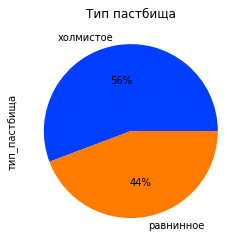

In [42]:
ferma_main['тип_пастбища'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Тип пастбища', colors = color)
plt.show()

56% пастбищ - холмистые

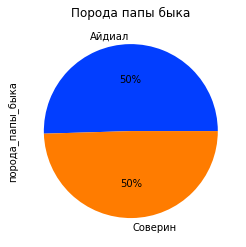

In [43]:
ferma_main['порода_папы_быка'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Порода папы быка', colors = color)
plt.show()

Породы распределены поровну.

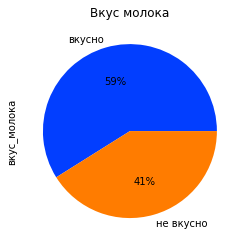

In [44]:
ferma_main['вкус_молока'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Вкус молока',colors = color)
plt.show()

60% молока - вкусное

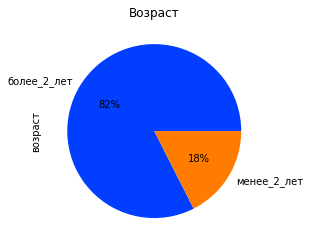

In [45]:
ferma_main['возраст'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Возраст',colors = color)
plt.show()

У 82% коров возраст более 2 лет.

### Вывод: 
Был проведён исследовательский анализ данных, благодаря чему мы узнали:

Удой - Один выброс был успешно удалён. Теперь выбросов нет, распределение близкое к нормальному. Медианное значение - 6132.5
ЭКЭ - Выбросов нет. Медианное значение - 14.7.

Сырой протеин - Выбросов нет. Медианное значение - 1888.

СПО - Выбросов нет. Медианное значение - 0.93 . На графике видно, что некоторые значения встречаются наиболее часто.

Белок - Есть значения, похожие на выборсы. Не разница не велика, поэтому можно оставить. Распределение близкое к нормальному. Медианное значение - 3.076.

Жирность - Есть множество выбросов, но поскольку молоко жирностью 3% является нормой, можно их не удалять. Медианное значение - 3.65.

Порода - Примерно 60% коров-породы Вис Бик Айдиал

Тип пастбища - 56% пастбищ - холмистые

Порода папы быка - Породы распределены поровну.

Вкус - 60% молока - вкусное

Возраст - У 82% коров возраст более 2 лет.

# Корреляционный анализ

Поскольку большенство данных распределено не нормально, лучше использовать коэффицент Спирмена 

In [46]:
# Построим таблицу корреляции
ferma_main.drop('id', axis=1).corr(method='spearman').style.background_gradient()

,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),жирность_%,белок_%
удой_кг,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
эке(энергетическая_кормовая_единица),0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
сырой_протеин_г,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
спо(сахаро_протеиновое_соотношение),0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
жирность_%,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
белок_%,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


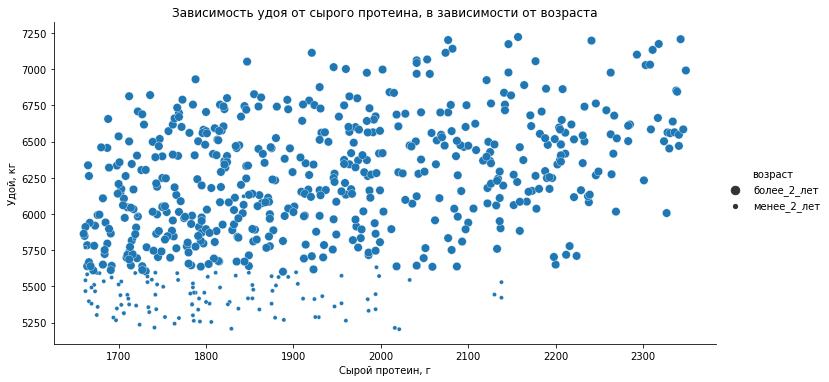

In [47]:
sns.relplot(data = ferma_main, x = 'сырой_протеин_г', y ='удой_кг', size = 'возраст', aspect = 2)
plt.title('Зависимость удоя от сырого протеина, в зависимости от возраста')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Удой, кг')
plt.show()

Корреляция удоя и сырового протеина - 0.437. Положительная корреляция, сильной зависимости нет.
Но заметна зависимость удоя от возраста коров: удой у коров, возрост который более 2 лет, больше, чем у коров, возраст которых менее 2 лет.

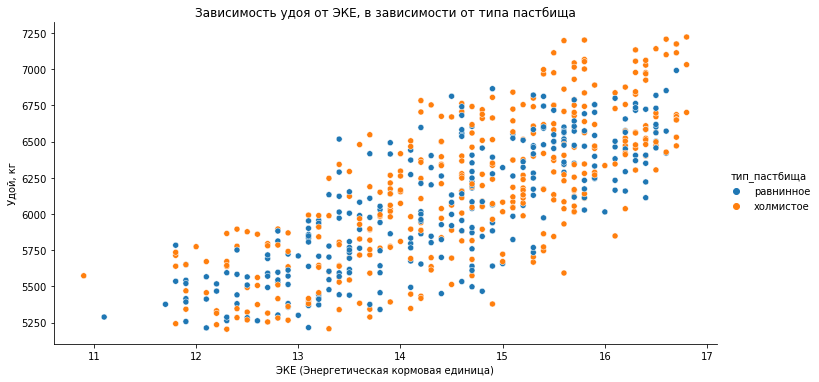

In [48]:
sns.relplot(data = ferma_main, x = 'эке(энергетическая_кормовая_единица)', y ='удой_кг', hue = 'тип_пастбища', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ, в зависимости от типа пастбища')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Удой, кг')
plt.show()

Корреляция удоя и ЭКЕ - 0.765. Сильная положительная корреляция. Тип пастбища особенно не влияет на удой.

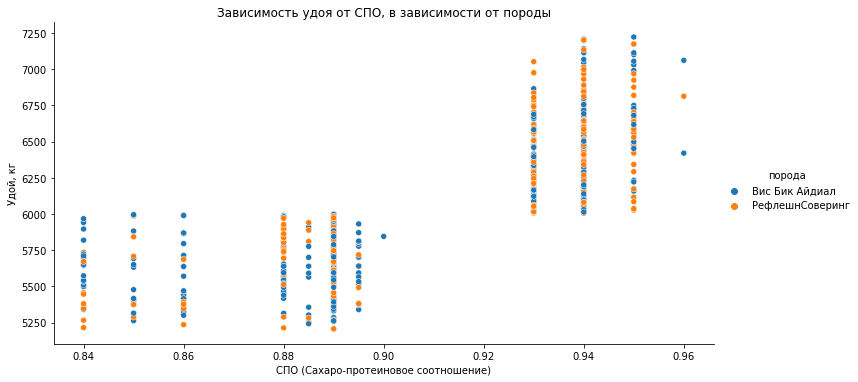

In [49]:
sns.relplot(data = ferma_main, x = 'спо(сахаро_протеиновое_соотношение)', y ='удой_кг', hue = 'порода', aspect = 2)
plt.title('Зависимость удоя от СПО, в зависимости от породы')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Удой, кг')
plt.show()

<div class="alert alert-warning">
<b>Комментарий 👉</b>



На примере моего(!) скрина отчётливо видно что ЭКЕ с удоем связно нелинейно (квадратично) и возведение ЭКЕ в степень улучшит наверняка линейную модель. 

Также видно что СПО имеет смысл перевести в категорию (на уровне между 0.91 - 0.92, примерно ... тоже на примере моего скрина).

p.s. **Эти 2 графика (с "добавлениями" на них) - они к тому, что волшебства в решении сделать СПО категориальным, а ЭКЕ квадратичным нет. Это решение мы принимаем не потому что нас осенило, а потому что нам графики это показывают. Это первый важный момент который не всегда мы чётко понимаем. Но есть и 2ой важный момент. Визуализации в ДА/ДС проекте - это не просто "красивые картинки". Это отображение данных в том виде, который позволяет РЕШЕНИЯ ПРИНИМАТЬ.**
</div>

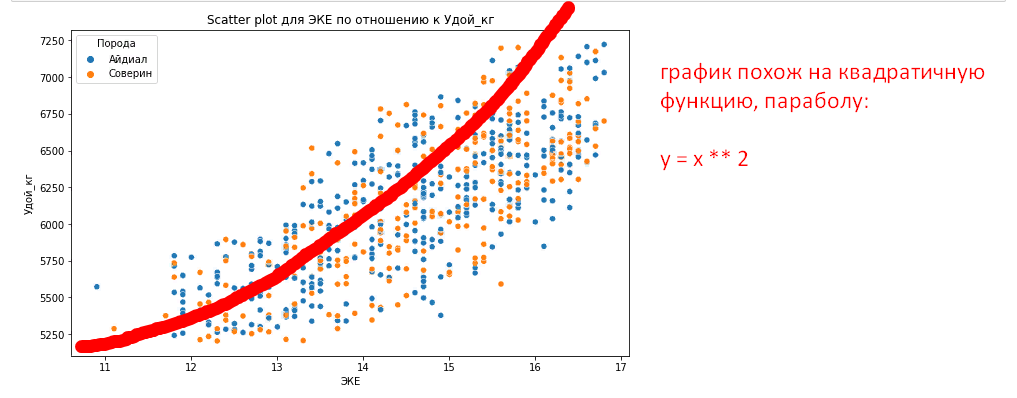

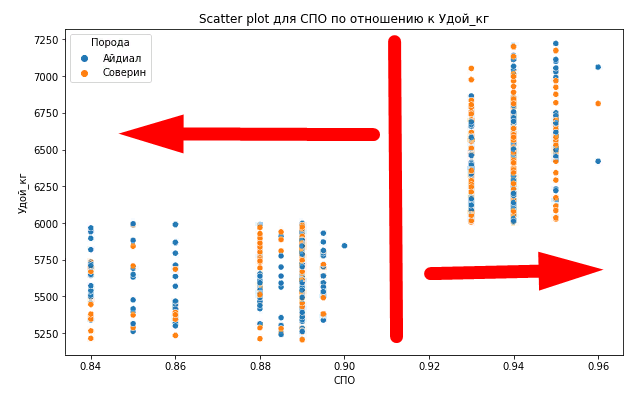

Корреляция удоя и СПО - 0.78. Сильная положительная корреляция, но оне нелинейная. Можно заметить, что при увеличении удоя, коров породы РефлешнСоверинг становитс больше, а коров породы Вис Бик Айдиал меньше

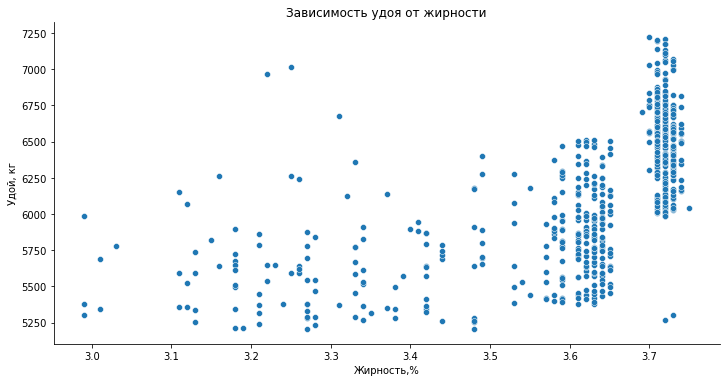

In [50]:
sns.relplot(data = ferma_main, x = 'жирность_%', y ='удой_кг', aspect = 2)
plt.title('Зависимость удоя от жирности')
plt.xlabel('Жирность,%')
plt.ylabel('Удой, кг')
plt.show()

Корреляция удоя и жирности - 0.68. Положительная корреляция. Сильной зависимости нету. Зависимость нелинейная.

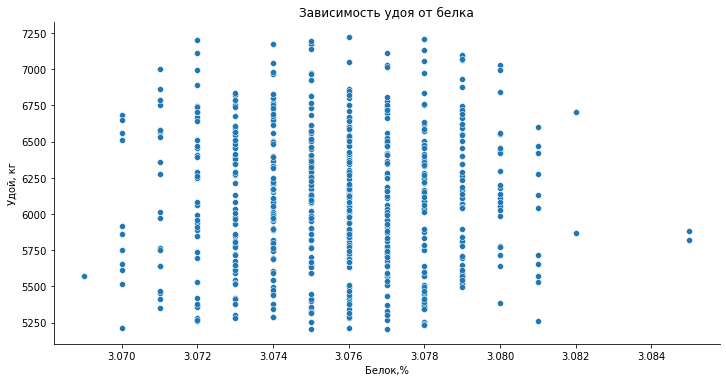

In [51]:
sns.relplot(data = ferma_main, x = 'белок_%', y ='удой_кг', aspect = 2)
plt.title('Зависимость удоя от белка')
plt.xlabel('Белок,%')
plt.ylabel('Удой, кг')
plt.show()

Коэффицент корреляции удоя и белка: -0.005. Зависимости нету.

### Вывод:
Была рассчитана корреляция между входными и целевыми признаками. Итог:
Корреляция удоя и сырового протеина - 0.437. Положительная корреляция, сильной зависимости нет. Но заметна зависимость удоя от возраста коров: удой у коров, возрост который более 2 лет, больше, чем у коров, возраст которых менее 2 лет.

Корреляция удоя и ЭКЕ - 0.765. Сильная положительная корреляция. Тип пастбища особенно не влияет на удой.

Корреляция удоя и СПО - 0.78. Сильная положительная корреляция, но оне нелинейная. Можно заметить, что при увеличении удоя, коров породы РефлешнСоверинг становитс больше, а коров породы Вис Бик Айдиал меньше

Корреляция удоя и жирности - 0.68. Положительная корреляция. Сильной зависимости нету. Зависимость нелинейная.

Коэффицент корреляции удоя и белка: -0.005. Зависимости нету.

#### Мультиколлениарности нет, так как коэффициенты корреляции должны быть больше 0.9. У нас таких нету.

# Обучение модели линейной регрессии

Создадим модель. Удалим столбцы: белок, жирность и вкус молока, так как на удой они не влияют.

In [73]:
y = ferma_main['удой_кг']
X = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'id'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
    ) 
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо(сахаро_протеиновое_соотношение)']

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.8170851028974593

Поскольку метрика не особо близка к 1, нужно улучшать модель.

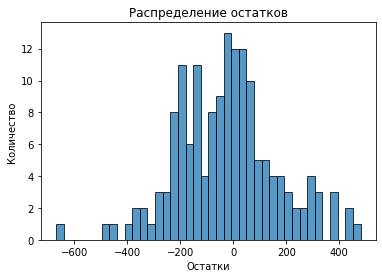

In [74]:
sns.histplot(data = y_test-predictions, bins = 40)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

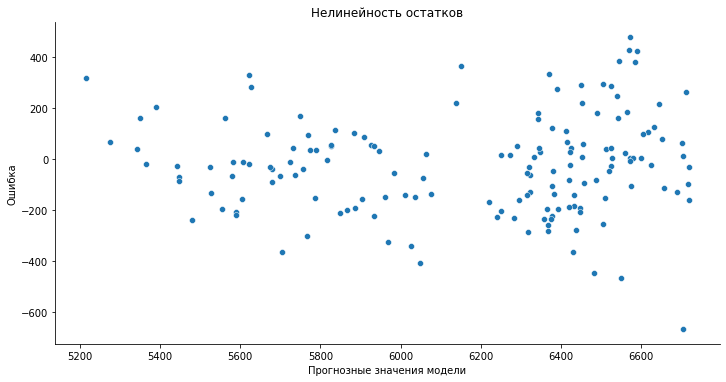

In [75]:
sns.relplot(x = predictions, y =y_test-predictions, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Ошибка')
plt.title('Нелинейность остатков')
plt.show()

Во-первых, остатки распределены мультимодально. Во-вторых, после прогнозного значения 6250 разброс остатков увеличивается.

### Итог:
1)Удалили столбцы: белок, жирность и вкус молока, так как на удой они не влияют.

2)Поскольку метрика не особо близка к 1, нужно улучшать модель.

3)Во-первых, остатки распределены мультимодально. Во-вторых, после прогнозного значения 6250 разброс остатков увеличивается.


In [76]:
mean_squared_error(y_test, predictions) 

37235.06453549296

In [77]:
mean_squared_error(y_test, predictions, squared = False) 

192.96389438310203

In [78]:
mean_absolute_error(y_test, predictions) 

149.05748696871012

In [79]:
ferma_main.loc[ferma_main['спо(сахаро_протеиновое_соотношение)'] >= 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 1
ferma_main.loc[ferma_main['спо(сахаро_протеиновое_соотношение)'] < 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 0
ferma_main['эке_в_квадрате'] = ferma_main['эке(энергетическая_кормовая_единица)']**2
ferma_main

,id,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,эке_в_квадрате
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,1.0,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16
625,626,5513,12.9,1700,0.0,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41
626,627,5970,14.4,1837,0.0,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36
627,628,5746,13.8,1994,0.0,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44


In [80]:
y = ferma_main['удой_кг']
X = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'эке(энергетическая_кормовая_единица)','id'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 
cat_col_names = ['спо(сахаро_протеиновое_соотношение)','порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['сырой_протеин_г', 'эке_в_квадрате']

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.8180879926867504

Значение метрики выросло примерно на 0.01, что недостаточно.

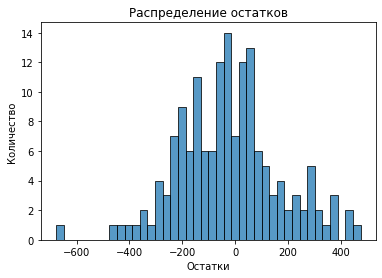

In [81]:
sns.histplot(data = y_test-predictions, bins = 40)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

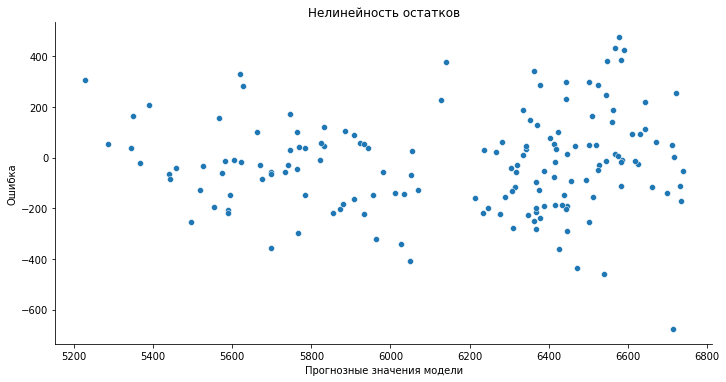

In [82]:
sns.relplot(x = predictions, y =y_test-predictions, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Ошибка')
plt.title('Нелинейность остатков')
plt.show()

Теперь рамспределение - бимодальное, да и распределение остатков стало по лучше.

#### Итог:

По сравнению с первой моделью была устранена нелинейность в признаках

r2 = 0.8180879926867504 модель всё ещё требует улучшений.

Остатки распределены бимодально (есть два гроба), так что модель требует улучшения.


In [83]:
mean_squared_error(y_test, predictions) 

37030.91131113693

In [84]:
mean_squared_error(y_test, predictions, squared = False) 

192.43417396901447

In [85]:
mean_absolute_error(y_test, predictions) 

149.03965222364596

In [86]:
ferma_main = pd.merge(ferma_main, ferma_dad, on = 'id')

In [95]:
y = ferma_main['удой_кг']
X = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'эке(энергетическая_кормовая_единица)','id'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 

cat_col_names = ['спо(сахаро_протеиновое_соотношение)','порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'эке_в_квадрате']

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.8247542745210404

Значение метрики немного выросло.

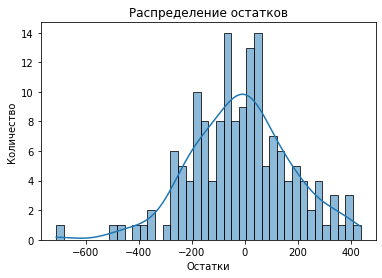

In [96]:
sns.histplot(data = y_test-predictions, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

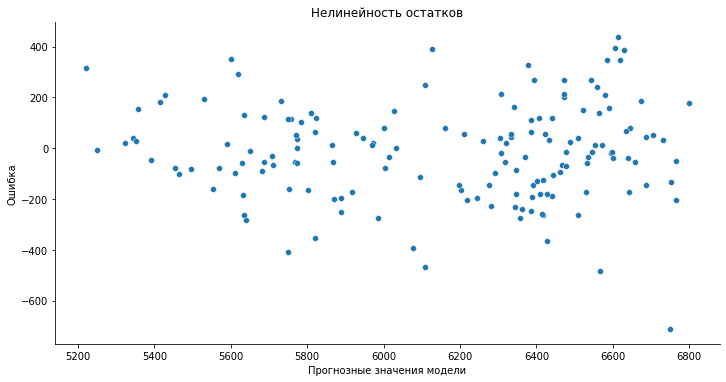

In [97]:
sns.relplot(x = predictions, y =y_test-predictions, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Ошибка')
plt.title('Нелинейность остатков')
plt.show()

#### Итог:
1)Был добавлен новый признак.

2)r2=0.8247542745210404, лучший показатель из трёх моделей.

3)Остатки стали больше походить на нормальное распределение.

Значит будем использовать третью модель.

In [98]:
mean_squared_error(y_test, predictions) 

35673.889886181976

In [99]:
mean_squared_error(y_test, predictions, squared = False) 

188.8753289505593

In [100]:
mean_absolute_error(y_test, predictions) 

146.16302445362322

In [101]:
np.quantile(predictions, 0.025), np.quantile(predictions, 0.025)

(5351.318280574307, 5351.318280574307)

С 95% вероятностью модель прогеозирует удой от 5351 до 6749кг.

Спрогнозируем удой коров в датасете 'cow_buy'

In [86]:
cow_buy['эке(энергетическая_кормовая_единица)'] = ferma_main['эке(энергетическая_кормовая_единица)'].mean()*1.05
cow_buy['эке_в_квадрате'] = cow_buy['эке(энергетическая_кормовая_единица)'] ** 2
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean()*1.05
cow_buy['спо(сахаро_протеиновое_соотношение)'] = ferma_main['спо(сахаро_протеиновое_соотношение)'].mean()*1.05
cow_buy['эке_в_квадрате'] = cow_buy['эке(энергетическая_кормовая_единица)']**2
cow_buy.loc[cow_buy['спо(сахаро_протеиновое_соотношение)'] >= 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 1
cow_buy.loc[cow_buy['спо(сахаро_протеиновое_соотношение)'] < 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 0
X = cow_buy.drop(['текущий_уровень_белок_%', 'текущая_жирность_%', 'эке(энергетическая_кормовая_единица)'], axis = 1)
X = X[['сырой_протеин_г', 'спо(сахаро_протеиновое_соотношение)', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'эке_в_квадрате','имя_папы']]
cat_col_names = ['спо(сахаро_протеиновое_соотношение)','порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'эке_в_квадрате']
X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_scaled = scaler.transform(X[num_col_names])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)
X = pd.concat([X_ohe, X_scaled], axis=1)
predictions = model_lr.predict(X)
cow_buy['удой_кг_прогноз'] = predictions
cow_buy.loc[cow_buy['удой_кг_прогноз']>=6000]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке(энергетическая_кормовая_единица),эке_в_квадрате,сырой_протеин_г,спо(сахаро_протеиновое_соотношение),удой_кг_прогноз
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6024.931199
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.0,6239.309548
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0,6188.366237
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6071.600389
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0.0,6217.479908
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6046.760839
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,233.361138,2019.947532,0.0,6264.149097
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468


### Вывод:
Во время данного этапа были обучены три модели линейной регрессии, посчитаны для них метрики и спрогнозирован удов коров, которых фермер хочет купить. 14 из 20 коров дают не менее 6000 кг удоя в год, что соответствует требованию заказчика.

# Обучение модели логистической регрессии

In [75]:
ferma_main.loc[ferma_main['вкус_молока'] == 'вкусно', 'вкус_молока'] = 1
ferma_main.loc[ferma_main['вкус_молока'] == 'не вкусно', 'вкус_молока'] = 0
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].astype('bool')
y = ferma_main['вкус_молока']
X = ferma_main.drop(['вкус_молока','id', 'эке(энергетическая_кормовая_единица)', 'удой_кг'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 

In [76]:
cat_col_names = ['спо(сахаро_протеиновое_соотношение)', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'жирность_%', 'белок_%', 'эке_в_квадрате']

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [77]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6305732484076433

In [78]:
recall_score(y_test, y_pred)

0.8636363636363636

In [79]:
precision_score(y_test, y_pred)

0.6229508196721312

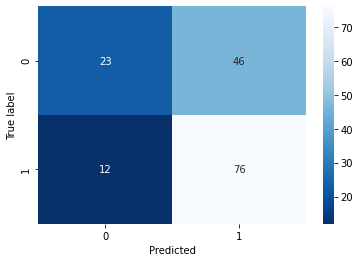

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Метрика recall показывает все ли истинные получили 1, значение метрики - 0.8636363636363636, метрика precision показывает количество случаев, когда вместо 0 предсказали 1, значение метрики - 0.6229508196721312. Для заказчика главное - вкус молока, значит нам необходимо, значит необходимо максимально увеличить precision. Для этого изменим порог классификации.

In [81]:
por = 0.5
while True:
    por += 0.01
    y_pred = (clf.predict_proba(X_test)[:,1] >= por).astype(bool)
    if (precision_score(y_test, y_pred) == 1): break
por

0.8100000000000003

In [82]:
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.81).astype(bool)

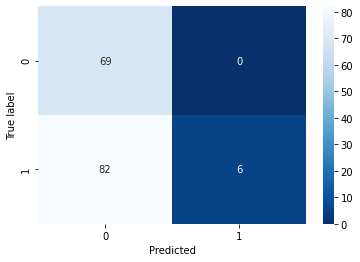

In [83]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

При пороге в 0.81 количество ошибок 1ого рода равно нулю.

In [84]:
cat_col_names = ['спо(сахаро_протеиновое_соотношение)', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'текущая_жирность_%', 'текущий_уровень_белок_%', 'эке_в_квадрате']
X = cow_buy.drop(['удой_кг_прогноз', 'эке(энергетическая_кормовая_единица)'] , axis = 1)

X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_scaled = scaler.transform(X[num_col_names])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)
X = pd.concat([X_ohe, X_scaled], axis=1)

In [85]:
predictions = (clf.predict_proba(X)[:,1] >= 0.81).astype(bool)
cow_buy['вкус_молока_прогноз'] = predictions
cow_buy.loc[cow_buy['вкус_молока_прогноз'] == True, 'вкус_молока_прогноз'] = 'вкусное'
cow_buy.loc[cow_buy['вкус_молока_прогноз'] == False, 'вкус_молока_прогноз'] = 'не вкусное'
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке(энергетическая_кормовая_единица),эке_в_квадрате,сырой_протеин_г,спо(сахаро_протеиновое_соотношение),удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468,вкусное
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6024.931199,не вкусное
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0,5930.219946,не вкусное
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.0,6239.309548,не вкусное
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0,6188.366237,не вкусное


### Вывод:
В рамках данного этапа была обучена модель логистическое регрессии, посчитаны метрики, подобран порог для сведения к нулю ошибки первого рода, а также спрогнозирован вкус молока.

# Итоговые выводы

In [86]:
cow_buy.loc[(cow_buy['удой_кг_прогноз'] > 6000) & (cow_buy['вкус_молока_прогноз'] == "вкусное")]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке(энергетическая_кормовая_единица),эке_в_квадрате,сырой_протеин_г,спо(сахаро_протеиновое_соотношение),удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468,вкусное
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6046.760839,вкусное


### Вывод:
Эти две коровы единственные, удовлетворяющие интересам фермера, с удоем более 6000 литров и вкусным молоком. Риск при их покупке минимальный.

Для улучшения качества регрессионой модели я использовал стандартизацию и кодирование категориальных признаков. На моём уровне обучения ещё больше улучшить данную модель не представляется возможным.

Логистическая модель была улучшена под заданые требования.С помощью важных метрик precision и recall, которые позволяют отследить ошибки первого или второго рода и минимизировать экономические убытки. Метрика precision стала равно 1.

В рамках данной работы был изучены несколько датафреймов. Они были проверены на пропуски и дубликаты. Пропусков не было, дубликаты были удалены. Далее были проанализированы данные, построены гистограммы, круговые диаграммы, графики зависимости и были рассчитаны коэффиценты корреляции для признаков датафреймов. После чего были обучены три модели линейной регрессии, одна модель логистической регрессии и были подведены итоги.